In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [26]:
def read_json_to_df(path):
    with open(path, 'rt') as f:
        file = json.load(f)
    data = []
    metric_names = []
    is_init_metric_names = False
    for num_epochs in file.keys():
        for percent in file[num_epochs].keys():
            for learner in file[num_epochs][percent]:

                # loss = file[num_epochs][percent][learner]['loss']
                metrics = file[num_epochs][percent][learner]['test_metrics']
                metric_list = []
                for  metric in metrics:
                    # print(metric)
                    if not is_init_metric_names:
                        metric_names.append(metric['metric_alias'])
                    metric_list.append(metric['value'])
                row = [learner, num_epochs, percent] + metric_list
                data.append(row)
                is_init_metric_names = True
    return pd.DataFrame(data, columns=['learner', 'num_epochs', 'percent'] + metric_names)

In [27]:
df = read_json_to_df('output/bert-base-uncased.json')

In [28]:
df

,learner,num_epochs,percent,f1 weighted,f1 macro,f1 micro,accuracy
0,active,5,5,0.799354,0.708927,0.811370,0.811370
1,random,5,5,0.817124,0.741844,0.821189,0.821189
2,active,5,10,0.789963,0.701858,0.804910,0.804910
3,random,5,10,0.814857,0.731978,0.822997,0.822997
4,active,5,15,0.786588,0.693653,0.804005,0.804005
5,random,5,15,0.809349,0.719840,0.822610,0.822610
6,active,5,20,0.786327,0.688910,0.806202,0.806202
7,random,5,20,0.813621,0.732399,0.821059,0.821059
8,active,7,5,0.798881,0.707425,0.812403,0.812403
9,random,7,5,0.810798,0.728447,0.819380,0.819380


In [29]:
active = df[df['learner'] == 'active']

In [30]:
random = df[df['learner'] == 'random']

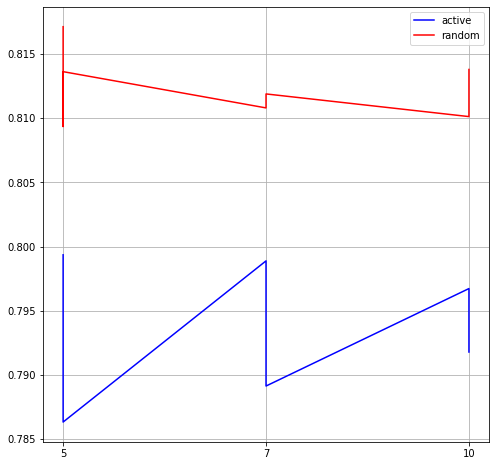

In [32]:
plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(active['num_epochs'], active['f1 weighted'], label='active', color='b')
plt.plot(random['num_epochs'], random['f1 weighted'], label='random', color='r')
plt.legend()